In [17]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


## Data import

In [18]:
df = pd.read_csv('CN_DB.csv')
print(df.columns)

Index(['suject_id', 'timestamp', 'season', 'city', 'climate', 'building_type',
       'heating_type', 'gender', 'age', 'ht', 'wt', 'thermal_sensation',
       'thermal_comfort', 'thermal_acceptability', 'clo', 'met', 'ta', 'rh',
       'vel', 'tg', 'top', 'tr', 't_out_min', 't_out_monthly', 'latitude'],
      dtype='object')


In [19]:
df_city = pd.read_csv('CN_DB_CITY.csv')
df_city

,city,records,thermal_sensation,ta,top,rh,vel,met,clo,latitude,tsr,p_dh,p_nv
0,HainanSanya,5,0.60,24.88,24.88,70.20,0.00,0.98,0.33,18.25,0.80,0.00,1.00
1,GuangdongGuangzhou,997,-0.01,23.85,23.88,52.94,0.10,1.00,0.86,23.13,0.90,0.00,0.00
2,YunnanKunming,415,-1.15,13.62,13.62,16.95,0.28,1.08,0.65,24.87,0.66,0.00,1.00
3,FujianFuzhou,7,-0.71,18.10,18.10,67.43,0.00,0.89,0.35,26.08,0.86,0.00,1.00
4,FujianZhenjiang,2,-0.50,22.90,22.90,74.50,0.00,0.90,0.31,26.10,0.50,0.00,1.00
5,FujianNanping,4,0.00,17.90,17.90,60.25,0.00,0.88,0.42,26.64,1.00,0.00,1.00
6,HunanHengyang,1,-1.00,16.90,16.90,66.00,0.00,0.90,0.66,26.89,1.00,0.00,1.00
7,HunanChangsha,1108,-0.40,17.22,17.41,48.35,0.03,1.02,0.95,28.23,0.93,0.00,0.58
8,SichuanZigong,23,-0.22,11.03,11.03,66.52,0.00,1.00,1.59,29.34,0.78,0.00,1.00
9,Lhasa,355,-1.10,10.64,10.64,71.19,0.02,1.10,1.25,29.65,0.64,0.01,0.68


Calcualte the distance of each city to Huai River (33˚N)

In [20]:
df_city['distance'] = df_city['latitude'] - 34
# multiple the distance by 111 to reflecct the distance in km
df_city['distance'] = df_city['distance'] * 111

## Sharp threshold assumption
All cities have disctrict heating systems if the distance is >= 0</br>
No city has disctrict heating systems if the distance is < 0

In [21]:
# create a new dummy variable based on the distance
df_rd = df_city.assign(threshold=(df_city["distance"] > 0).astype(int))

## Causal effect of district heating on temperature
Difference between the treatment and control group near the Huai river, which can be viewed as the nature experiment outcome

### Linear model

In [22]:
model = smf.wls("top~distance*threshold", df_rd, weights=df_rd["records"]).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,16.4482,1.657,9.927,0.000,13.059,19.837
distance,-0.0035,0.002,-1.444,0.160,-0.009,0.001
threshold,4.9102,2.022,2.428,0.022,0.774,9.046
distance:threshold,0.0045,0.003,1.617,0.117,-0.001,0.010


The coef of the "threshold" is the causal effect, and coef of "Intercept" is the basedline

### Quadratic model

In [23]:
df_rd['distance2'] = df_rd['distance'] ** 2
# try polynomial
model = smf.wls("top ~ distance2*threshold", df_rd, weights=df_rd["records"]).fit()
print("Baseline is:", model.summary().tables[1][1][1])
print("Effect is:", model.summary().tables[1][3][1])
print("pvalue is:", model.summary().tables[1][3][4])
model.summary().tables[1]

Baseline is:    17.1389
Effect is:     4.4266
pvalue is:  0.005


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,17.1389,1.129,15.180,0.000,14.830,19.448
distance2,2.957e-06,1.64e-06,1.807,0.081,-3.91e-07,6.3e-06
threshold,4.4266,1.468,3.015,0.005,1.423,7.430
distance2:threshold,-2.309e-06,1.87e-06,-1.238,0.226,-6.13e-06,1.51e-06


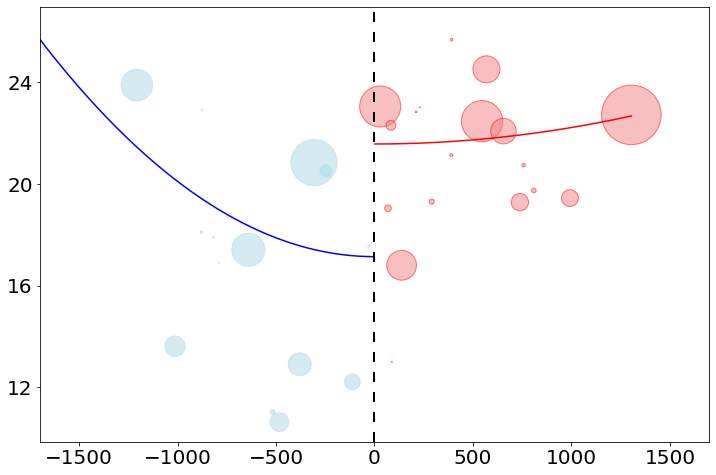

In [24]:
plt.figure(figsize=(12, 8))
# Split the data into two parts
df_below = df_rd[df_rd['distance'] < 0]
df_above = df_rd[df_rd['distance'] >= 0]
# Scatter plot for points below the threshold
plt.scatter(df_below['distance'], df_below['top'], 
            s=df_below['records'], facecolors='lightblue', 
            alpha=0.5, label='No District Heating')

# Scatter plot for points above the threshold
plt.scatter(df_above['distance'], df_above['top'], 
            s=df_above['records'], facecolors='lightcoral', edgecolors='red', 
            alpha=0.5, label='District Heating')

# Generate a fine grid of distance values
distance_grid = np.linspace(df_rd['distance'].min(), df_rd['distance'].max(), 500)

# Compute threshold values for each point
threshold_grid = (distance_grid >= 0).astype(int)

# Create a DataFrame for the grid
grid_df = pd.DataFrame({'distance': distance_grid, 'distance2': distance_grid**2, 'threshold': threshold_grid})

# Predict based on the grid
predictions = model.predict(grid_df)

# Separate predictions for below and above the threshold
grid_below = grid_df[grid_df['distance'] < 0]
grid_above = grid_df[grid_df['distance'] >= 0]
pred_below = predictions[grid_df['distance'] < 0]
pred_above = predictions[grid_df['distance'] >= 0]

# Plot the smooth quadratic predictions
plt.plot(grid_below['distance'], pred_below, color='blue', linewidth=1.5, label='Fitted (Domestic Heating)')
plt.plot(grid_above['distance'], pred_above, color='red', linewidth=1.5, label='Fitted (District Heating)')

# Add vertical dashed line at the threshold
plt.axvline(x=0, color='black', linestyle="--", linewidth=2, label='Huai River Threshold', dashes=(5, 5))

# Adjust ticks and labels
plt.xticks(fontsize=20)
plt.yticks(np.arange(12, 28, 4), fontsize=20)
plt.xlim(-1700, 1700)

# Save as SVG
# plt.savefig('fig3a.svg', format='svg')
plt.show()

## Causal effect on thermal sensation vote

### Linear model

In [25]:
model = smf.wls("thermal_sensation~distance*threshold", df_rd, weights=df_rd["records"]).fit()
print("Baseline is:", model.summary().tables[1][1][1])
print("Effect is:", model.summary().tables[1][3][1])
print("pvalue is:", model.summary().tables[1][3][4])
model.summary().tables[1]

Baseline is:    -0.4039
Effect is:     0.6374
pvalue is:  0.020


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.4039,0.212,-1.903,0.067,-0.838,0.030
distance,-3.029e-05,0.000,-0.097,0.924,-0.001,0.001
threshold,0.6374,0.259,2.461,0.020,0.108,1.167
distance:threshold,3.215e-05,0.000,0.090,0.929,-0.001,0.001


### Quadratic model

In [26]:
model = smf.wls("thermal_sensation ~ distance2*threshold", df_rd, weights=df_rd["records"]).fit()
print("Baseline is:", model.summary().tables[1][1][1])
print("Effect is:", model.summary().tables[1][3][1])
print("pvalue is:", model.summary().tables[1][3][4])
model.summary().tables[1]

Baseline is:    -0.4314
Effect is:     0.6441
pvalue is:  0.002


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.4314,0.147,-2.944,0.006,-0.731,-0.132
distance2,9.833e-08,2.12e-07,0.463,0.647,-3.36e-07,5.33e-07
threshold,0.6441,0.191,3.379,0.002,0.254,1.034
distance2:threshold,-6.89e-08,2.42e-07,-0.285,0.778,-5.64e-07,4.26e-07


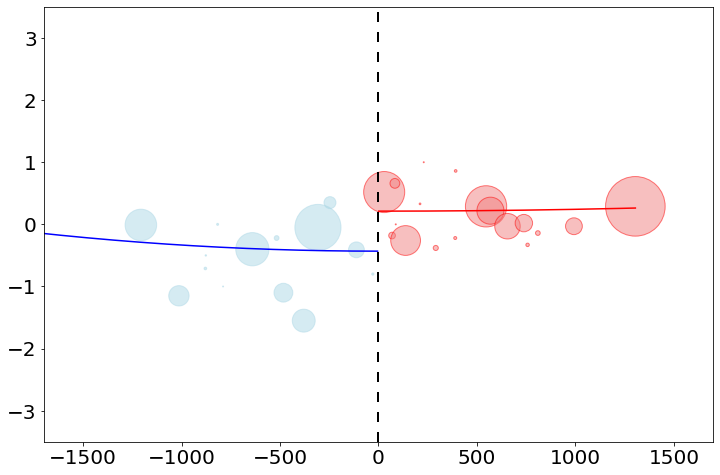

In [27]:
plt.figure(figsize=(12, 8))

# Split the data into two parts
df_below = df_rd[df_rd['distance'] < 0]
df_above = df_rd[df_rd['distance'] >= 0]

# Scatter plot for points below the threshold
plt.scatter(df_below['distance'], df_below['thermal_sensation'], 
            s=df_below['records'], facecolors='lightblue', 
            alpha=0.5, label='No District Heating')

# Scatter plot for points above the threshold
plt.scatter(df_above['distance'], df_above['thermal_sensation'], 
            s=df_above['records'], facecolors='lightcoral', edgecolors='red', 
            alpha=0.5, label='District Heating')

# Generate a fine grid of distance values
distance_grid = np.linspace(df_rd['distance'].min(), df_rd['distance'].max(), 500)

# Compute threshold values for each point
threshold_grid = (distance_grid >= 0).astype(int)

# Create a DataFrame for the grid
grid_df = pd.DataFrame({'distance': distance_grid, 'distance2': distance_grid**2, 'threshold': threshold_grid})

# Predict based on the grid
predictions = model.predict(grid_df)

# Separate predictions for below and above the threshold
grid_below = grid_df[grid_df['distance'] < 0]
grid_above = grid_df[grid_df['distance'] >= 0]
pred_below = predictions[grid_df['distance'] < 0]
pred_above = predictions[grid_df['distance'] >= 0]

# Plot the smooth quadratic predictions
plt.plot(grid_below['distance'], pred_below, color='blue', linewidth=1.5, label='Fitted (Domestic Heating)')
plt.plot(grid_above['distance'], pred_above, color='red', linewidth=1.5, label='Fitted (District Heating)')

# Add vertical dashed line at the threshold
plt.axvline(x=0, color='black', linestyle="--", linewidth=2, label='Huai River Threshold', dashes=(5, 5))

# Adjust ticks and labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-1700, 1700)
plt.ylim(-3.5, 3.5)

# plt.savefig('fig3b.svg', format='svg')
plt.show()


## Spurious correlations on thermal satisfaction rate

In [28]:
model = smf.wls("tsr~top", df_rd, weights=df_rd["records"]).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.5690,0.096,5.903,0.000,0.372,0.766
top,0.0138,0.005,3.004,0.005,0.004,0.023


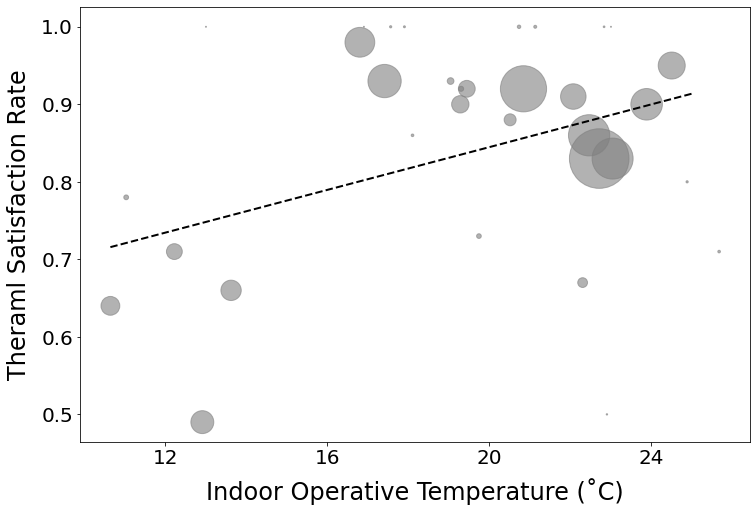

In [29]:
# Initialize figure
plt.figure(figsize=(12, 8))

# Scatter plot for points below the threshold
plt.scatter(df_rd['top'], df_rd['tsr'], 
            s=df_rd['records'], facecolors='grey', edgecolors='grey', 
            alpha=0.6)

# Plot the fitted lines smoothly
top_grid = np.linspace(df_rd['top'].min(), 25, 500)
pred_all = model.predict(pd.DataFrame({'top': top_grid}))
plt.plot(top_grid, pred_all, color='black', linewidth=2, linestyle='--', label='Fitted (All Data)')

# Adjust ticks and labels
plt.xticks(np.arange(12, 28, 4), fontsize=20)
plt.yticks(np.arange(0.5, 1.05, 0.1), fontsize=20)

# Add axis labels
plt.xlabel('Indoor Operative Temperature (˚C)', fontsize=24, labelpad=10)
plt.ylabel('Theraml Satisfaction Rate', fontsize=24, labelpad=10)

# Show the plot
plt.show()


In [30]:
# Split the data into two parts based on the threshold of 16 degrees
df_below = df_rd[df_rd['distance'] < 0]
df_above = df_rd[df_rd['distance'] >= 0]

# Fit the models for each group
model_below = smf.wls("tsr ~ top", weights=df_below["records"], data=df_below).fit()
model_above = smf.wls("tsr ~ top", weights=df_above["records"], data=df_above).fit()

print(model_below.summary().tables[1])
print(model_above.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3311      0.113      2.928      0.012       0.087       0.575
top            0.0273      0.006      4.570      0.001       0.014       0.040
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2283      0.130      9.414      0.000       0.952       1.505
top           -0.0164      0.006     -2.785      0.013      -0.029      -0.004


/Users/ruijisun/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/ruijisun/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


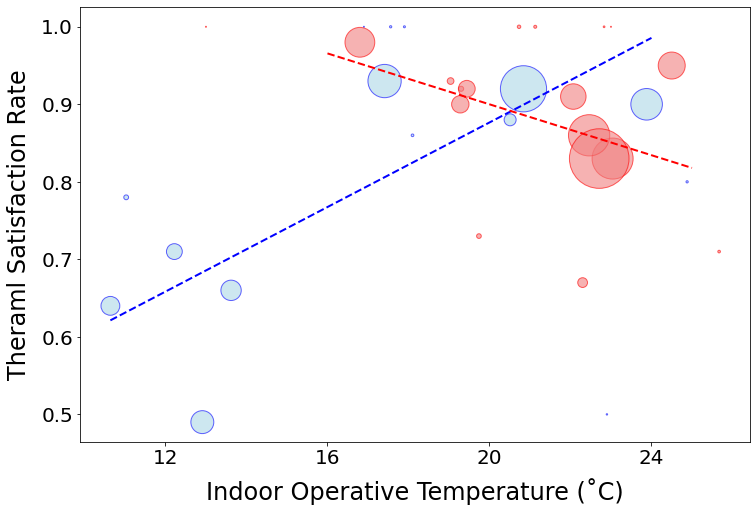

<Figure size 432x288 with 0 Axes>

In [ ]:
# Initialize figure
plt.figure(figsize=(12, 8))

# Scatter plot for points below the threshold
plt.scatter(df_below['top'], df_below['tsr'], 
            s=df_below['records'], facecolors='lightblue', edgecolors='blue', 
            alpha=0.6, label='Cool Indoor Environment')

# Scatter plot for points above the threshold
plt.scatter(df_above['top'], df_above['tsr'], 
            s=df_above['records'], facecolors='lightcoral', edgecolors='red', 
            alpha=0.6, label='Warm Indoor Environment')

# Plot the fitted lines smoothly
top_grid_above = np.linspace(16, 25, 500)
top_grid = np.linspace(df_rd['top'].min(), 24, 500)
pred_below = model_below.predict(pd.DataFrame({'top': top_grid}))
pred_above = model_above.predict(pd.DataFrame({'top': top_grid_above}))
plt.plot(top_grid, pred_below, color='blue', linewidth=2, linestyle='--', label='Fitted (Cool Indoor Environment)')
plt.plot(top_grid_above, pred_above, color='red', linewidth=2, linestyle='--', label='Fitted (Warm Indoor Environment)')

# Adjust ticks and labels
plt.xticks(np.arange(12, 28, 4), fontsize=20)
plt.yticks(np.arange(0.5, 1.05, 0.1), fontsize=20)

# Add axis labels
plt.xlabel('Indoor Operative Temperature (˚C)', fontsize=24, labelpad=10)
plt.ylabel('Theraml Satisfaction Rate', fontsize=24, labelpad=10)

# Show the plot
plt.show()